In [1]:
import numpy as np
samp_v=np.loadtxt('samp_v_All_467.txt')

In [2]:
print(len(samp_v))

465000


In [ ]:
import numpy as np

# --- 参数 ---
N_SAMP = 1000             # 每个源的样本数
V_MAX_CAP = 10000.0       # 速度上限 (km/s)

# 假设 samp_v 已经加载，我们获取总样本数
TOTAL_SAMPLES = len(samp_v)
N_STARS = int(TOTAL_SAMPLES / N_SAMP)
rng = np.random.default_rng(12345)

# 最终存储被接受的 V_3D 样本的数组
V_3D_accepted = np.zeros(TOTAL_SAMPLES)
k = 0 # V_3D_accepted 数组的计数器

print(f"--- 启动拒绝采样，目标 V_3D < {V_MAX_CAP:.0f} km/s ---")

# 外层循环：遍历每个源 (465 个)
for i in range(N_STARS):
    
    # 提取当前源的 1000 个固定的 v_trans 样本
    v_trans_samples = samp_v[i * N_SAMP : (i + 1) * N_SAMP]
    # 内层循环：遍历当前源的 1000 个固定 v_trans 样本
    for j in range(N_SAMP):
        v_trans_j = v_trans_samples[j] # 当前固定的 v_trans 值
        
        # 拒绝采样循环：持续生成角度，直到满足 V_MAX_CAP
        while True:
            # 1. 随机采样一个新的 cos(theta) (实现各向同性)
            cos_theta = rng.uniform(-1.0, 1.0)
            
            # 2. 计算 sin(theta)
            sin_theta = np.sqrt(1.0 - cos_theta**2)
            
            # 3. 计算试探 V_3D 值 (添加极小值保护，防止 sin_theta 严格为 0)
            sin_theta = np.maximum(sin_theta, 1e-10) 
            V_3D_trial = v_trans_j / sin_theta
            
            # 4. 验收条件
            if V_3D_trial < V_MAX_CAP:
                # 样本被接受，存储结果，并退出 while 循环
                V_3D_accepted[k] = V_3D_trial
                k += 1
                break
            # 否则 (V_3D_trial >= V_MAX_CAP)，继续 while 循环，重新采样 cos(theta)
    
    # 可选：打印进度
    if (i + 1) % 100 == 0:
        print(f"  已处理 {i + 1}/{N_STARS} 个源...")

print("\n拒绝采样完成。")
print(f"最终生成的 V_3D 最大值: {np.max(V_3D_accepted):.2f} km/s")

# 最终使用的数组是 V_3D_accepted

--- 启动拒绝采样，目标 V_3D < 10000 km/s ---
  已处理 100/465 个源...
  已处理 200/465 个源...
  已处理 300/465 个源...
  已处理 400/465 个源...

拒绝采样完成。
最终生成的 V_3D 最大值: 9998.00 km/s


(0.0, 4000.0)

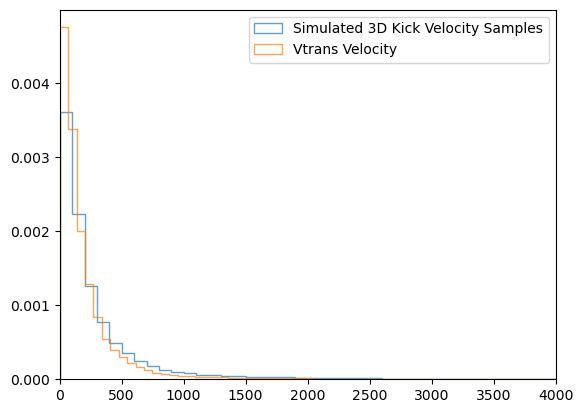

In [27]:
import matplotlib.pyplot as plt
plt.hist(V_3D_accepted,bins=100,density=True,alpha=0.7,histtype='step',label='Simulated 3D Kick Velocity Samples')
plt.hist(samp_v,bins=100,density=True,alpha=0.7,histtype='step',label='Vtrans Velocity')
plt.legend()
plt.xlim(0,4000)

In [ ]:
np.savetxt('samp_v_all_465_3D.txt',V_3D_accepted)


In [1]:
import numpy as np
samp_v_new=np.loadtxt('samp_v_all_465_3D.txt')

In [2]:
print(min(samp_v_new),max(samp_v_new))

1.5607885066851739 9998.001519843881


In [3]:
import numpy as np
from scipy.special import erf
from scipy.stats import beta as beta_dist
from scipy.stats import truncnorm
from scipy.interpolate import interp1d
import bilby
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.prior import LogUniform
from bilby.hyper.likelihood import HyperparameterLikelihood
from scipy import interpolate
from scipy import integrate
import random
import argparse
import os
import glob
import warnings
warnings.filterwarnings("ignore")
#####################
outdir='/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
data_exp=samp_v_new
import sys
#import utilizes
npool=300
NN=int(len(data_exp)/1000)
nlive=800
mx=1000
#################################
data_df=list()
ns_m=abs(data_exp)
for i in range(NN):
    re=pd.DataFrame(ns_m[i*mx:(i+1)*mx],columns=['mu'])
    data_df.append(re)
samples = data_df

def run_prior(dataset):
    return 1/2600



16:45 bilby INFO    : Running for label 'u_hype_2706', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
16:45 bilby INFO    : Analysis priors:
16:45 bilby INFO    : k=LogUniform(minimum=0.1, maximum=5, name='k', latex_label='$k$', unit=None, boundary=None)
16:45 bilby INFO    : theta=Uniform(minimum=10, maximum=300, name='theta', latex_label='$\\theta$(km/s)', unit=None, boundary=None)
16:45 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:45 bilby INFO    : Analysis likelihood noise evidence: 0
16:45 bilby INFO    : Single likelihood evaluation took 7.275e-03 s
16:45 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': N

1it [00:00, ?it/s]

17:03 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_2706_resume.pickle
17:13 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_2706_resume.pickle
17:13 bilby INFO    : Starting to close worker pool.
17:13 bilby INFO    : Finished closing worker pool.


17:13 bilby INFO    : Rejection sampling nested samples to obtain 2179 posterior samples
17:13 bilby INFO    : Sampling time: 0:21:53.501827
17:13 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:13 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:13 bilby INFO    : Summary of results:
nsamples: 2179
ln_noise_evidence:  0.000
ln_evidence: 599.485 +/-  0.097
ln_bayes_factor: 599.485 +/-  0.097



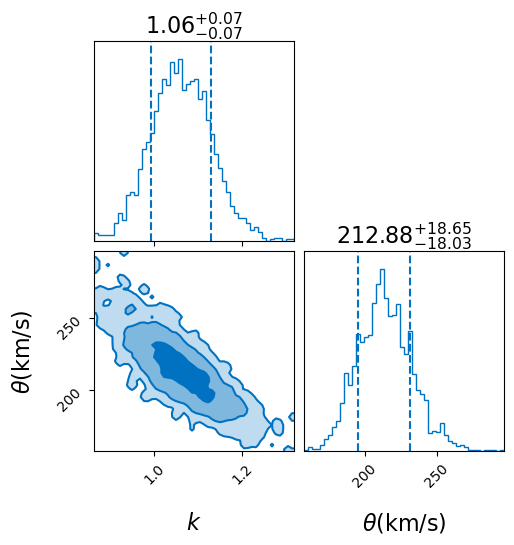

In [54]:
from scipy.special import beta
from scipy.special import gamma
def hyper_prior_gamma(dataset, k,theta):
    return (1 / (gamma(k)*theta**k)) * dataset['mu']**(k-1) *np.exp(-dataset['mu']/theta)

hp_priors_gamma = dict(k=LogUniform(0.1,5, 'k',r'$k$'),
                theta=Uniform(10, 300, 'theta',r'$\theta$(km/s)') )

hyper_prior_gamma=hyper_prior_gamma

hp_likelihood_gamma = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_gamma,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_gamma =hp_priors_gamma
# And run sampler
result_gamma = run_sampler(
    likelihood=hp_likelihood_gamma, priors=hp_priors_gamma, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_gamma.plot_corner(title_fmt='.1f')

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2153541/488805931.py:8: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 500, 's_mu', '$\mu$'),
/tmp/ipykernel_2153541/488805931.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma=Uniform(10, 500, 's_sigma', '$\sigma$'))
11:40 bilby INFO    : Running for label 'u_hype_74241', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
11:40 bilby INFO    : Analysis priors:
11:40 bilby INFO    : mu=Uniform(minimum=10, maximum=500, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
11:40 bilby INFO    : sigma=Uniform(minimum=10, maximum=500, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
11:40 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.Hype

1it [00:00, ?it/s]

11:43 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_74241_resume.pickle
11:43 bilby INFO    : Starting to close worker pool.
11:43 bilby INFO    : Finished closing worker pool.
11:43 bilby INFO    : Rejection sampling nested samples to obtain 2492 posterior samples
11:43 bilby INFO    : Sampling time: 0:02:32.576646
11:43 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
11:43 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


11:43 bilby INFO    : Summary of results:
nsamples: 2492
ln_noise_evidence:  0.000
ln_evidence: 551.099 +/-  0.108
ln_bayes_factor: 551.099 +/-  0.108



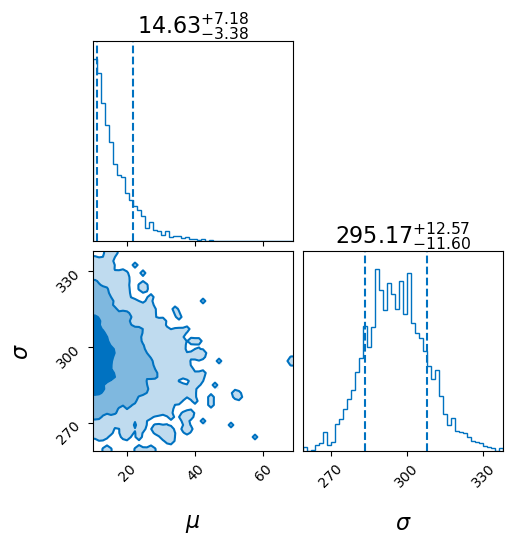

In [35]:
#begin Gaussian model with fixed upper and lower mass
def hyper_prior_G_fixed_max_min(dataset, mu, sigma):
    mup=10000
    mlo=1
    normalisingTerm = 0.5 * ( erf((mu-mlo)/(np.sqrt(2) * sigma)) -  erf((mu-mup)/(np.sqrt(2) * sigma)) )
    return ( ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))*((mu>mlo)&(mu<mup)) * (np.exp(- (dataset['mu'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5) / normalisingTerm 
hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 500, 's_mu', '$\mu$'),
                 sigma=Uniform(10, 500, 's_sigma', '$\sigma$'))
#end Gaussian with fixed upper and lower ma
#end Gaussian model 
hyper_prior_G=hyper_prior_G_fixed_max_min

hp_likelihood_G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_G =hp_priors_G_fixed_max_min

# And run sampler
result_G = run_sampler(
    likelihood=hp_likelihood_G, priors=hp_priors_G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_G.plot_corner()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2153541/2643980441.py:9: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 150, 'mu1', '$\mu_1$'),
/tmp/ipykernel_2153541/2643980441.py:10: SyntaxWarning: invalid escape sequence '\s'
  sigma1=Uniform(100, 300, 'sigma1', '$\sigma_1$'),
/tmp/ipykernel_2153541/2643980441.py:11: SyntaxWarning: invalid escape sequence '\m'
  mu2=Uniform(10, 1000, 'mu2', '$\mu_2$'),
/tmp/ipykernel_2153541/2643980441.py:12: SyntaxWarning: invalid escape sequence '\s'
  sigma2=Uniform(400, 1800, 'sigma2', '$\sigma_2$'),
15:00 bilby INFO    : Running f

1it [00:00, ?it/s]

15:10 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_29044_resume.pickle
15:10 bilby INFO    : Starting to close worker pool.
15:10 bilby INFO    : Finished closing worker pool.
15:10 bilby INFO    : Rejection sampling nested samples to obtain 3092 posterior samples
15:10 bilby INFO    : Sampling time: 0:09:29.899784
15:10 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


15:10 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:10 bilby INFO    : Summary of results:
nsamples: 3092
ln_noise_evidence:  0.000
ln_evidence: 611.768 +/-  0.108
ln_bayes_factor: 611.768 +/-  0.108



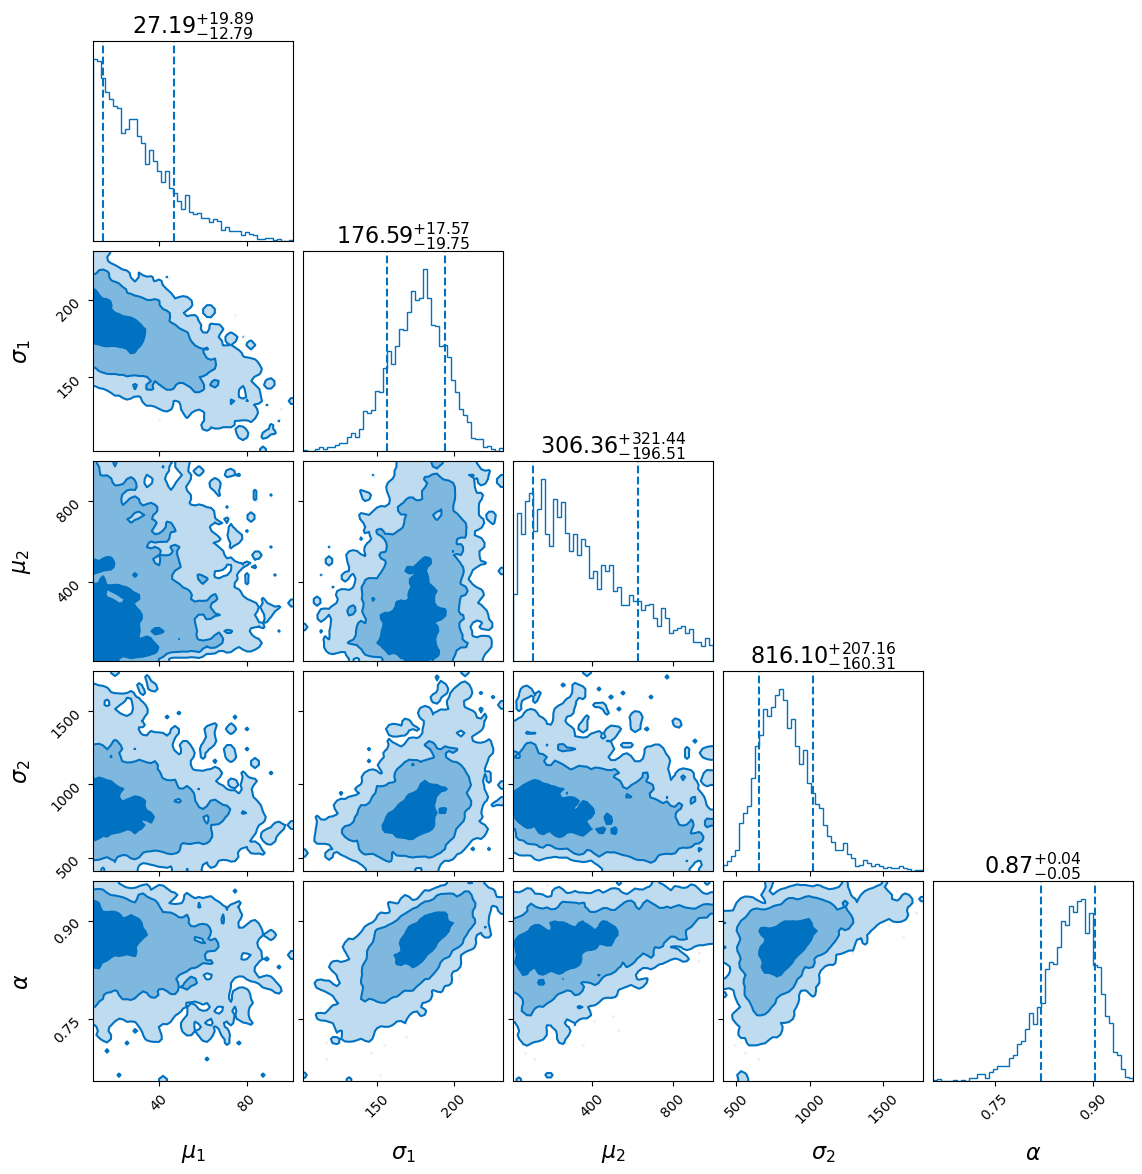

In [38]:
def hyper_prior_2G_fixed_max_min(dataset, mu1, sigma1,mu2,sigma2,alpha):
    mup=10000
    mlo=1
    normalisingTerm1 = 0.5 * ( erf((mu1-mlo)/(np.sqrt(2) * sigma1)) -  erf((mu1-mup)/(np.sqrt(2) * sigma1)) )
    normalisingTerm2 = 0.5 * ( erf((mu2-mlo)/(np.sqrt(2) * sigma2)) -  erf((mu2-mup)/(np.sqrt(2) * sigma2)) )
    return ((mu2 < mup ) & (mu1 > mlo) & (mu1 < mu2)  & ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) *\
        ( (( alpha*(np.exp(- (dataset['mu'] - mu1)**2 / (2 * sigma1**2)) /(2 * np.pi * sigma1**2)**0.5)) /normalisingTerm1) +\
        (1-alpha)*( ((np.exp(- (dataset['mu'] - mu2)**2 / (2 * sigma2**2)) /(2 * np.pi * sigma2**2)**0.5) ) / normalisingTerm2) )
hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 150, 'mu1', '$\mu_1$'),
                 sigma1=Uniform(100, 300, 'sigma1', '$\sigma_1$'),
                mu2=Uniform(10, 1000, 'mu2', '$\mu_2$'),
                sigma2=Uniform(400, 1800, 'sigma2', '$\sigma_2$'),
                alpha=Uniform(0.01, 0.99, 'alpha', '$\\alpha$'))
#end two-Gausssian model with fixed lower and upper mass
 
hyper_prior_2G=hyper_prior_2G_fixed_max_min
hp_likelihood_2G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_2G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_2G =hp_priors_2G_fixed_max_min

# And run sampler
result_2G = run_sampler(
    likelihood=hp_likelihood_2G, priors=hp_priors_2G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_2G.plot_corner()

10:16 bilby INFO    : Running for label 'u_hype_4548', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
10:16 bilby INFO    : Analysis priors:
10:16 bilby INFO    : a=Uniform(minimum=10, maximum=200, name='a', latex_label='$a$', unit=None, boundary=None)
10:16 bilby INFO    : mlo=Uniform(minimum=1, maximum=10, name='mlow', latex_label='$m_{low}$', unit=None, boundary=None)
10:16 bilby INFO    : mup=Uniform(minimum=10, maximum=10000.0, name='mup', latex_label='$m_{up}$', unit=None, boundary=None)
10:16 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
10:16 bilby INFO    : Analysis likelihood noise evidence: 0
10:16 bilby INFO    : Single likelihood evaluation took 9.723e-03 s
10:16 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 30

1it [00:00, ?it/s]

10:19 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_4548_resume.pickle
10:19 bilby INFO    : Starting to close worker pool.
10:19 bilby INFO    : Finished closing worker pool.
10:19 bilby INFO    : Rejection sampling nested samples to obtain 2075 posterior samples
10:19 bilby INFO    : Sampling time: 0:02:22.579800
10:19 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
10:19 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


10:19 bilby INFO    : Summary of results:
nsamples: 2075
ln_noise_evidence:  0.000
ln_evidence: 225.121 +/-  0.075
ln_bayes_factor: 225.121 +/-  0.075



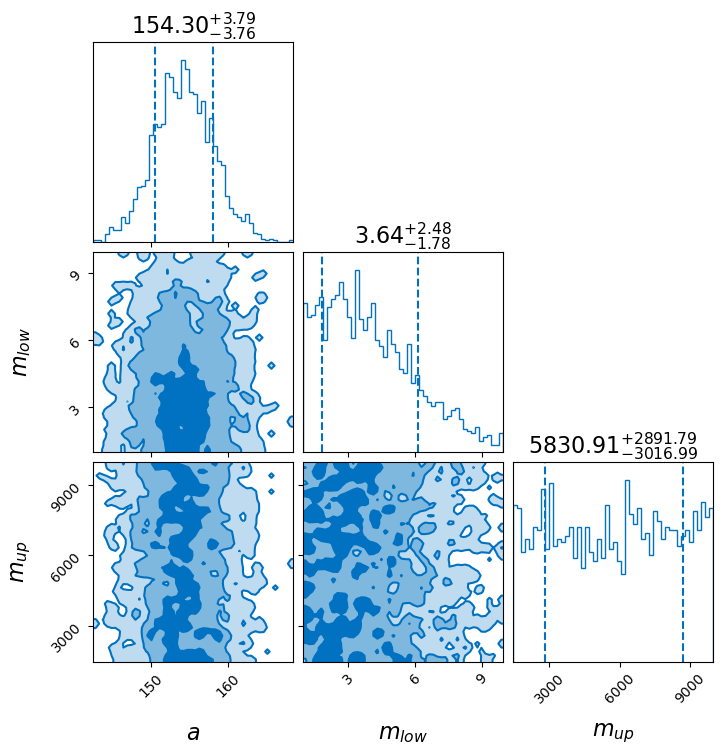

In [4]:
def _mb_cdf(v, a):
    """
    Maxwell-Boltzmann CDF for scale parameter a:
    F(v; a) = erf(v/(sqrt(2)*a)) - sqrt(2/pi) * (v/a) * exp(-v^2/(2 a^2))
    Works with v as scalar or numpy array (a scalar).
    """
    return erf(v / (np.sqrt(2) * a)) - np.sqrt(2.0 / np.pi) * (v / a) * np.exp(-v**2 / (2.0 * a**2))

def hyper_prior_MB(dataset, a, mlo, mup):
    x = np.asarray(dataset['mu'])
    data_mask = (x >= mlo) & (x <= mup)
    param_mask = (a > 0) & (mup > mlo) & (mlo >= 0)
    if not param_mask:
        return np.zeros_like(x, dtype=float)

    # MB pdf: f(v; a) = sqrt(2/pi) * v^2 / a^3 * exp(-v^2 / (2 a^2))
    # MB peak: v_peak=sqrt(2)*a
    pref = np.sqrt(2.0 / np.pi)
    pdf_vals = pref * x**2 / a**3 * np.exp(-x**2 / (2.0 * a**2))

    normalisingTerm = _mb_cdf(mup, a) - _mb_cdf(mlo, a)
    if normalisingTerm <= 0 or not np.isfinite(normalisingTerm):
        return np.zeros_like(x, dtype=float)

    out = np.zeros_like(x, dtype=float)
    out[data_mask] = pdf_vals[data_mask] / normalisingTerm
    return out

hp_priors_MB = dict(
    a=Uniform(10, 200, 'a', '$a$'),
    mlo=Uniform(1, 10, 'mlow', '$m_{low}$'),
    mup=Uniform(10, 10000.0, 'mup', '$m_{up}$')
)

hyper_prior=hyper_prior_MB

hp_likelihood = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors =hp_priors_MB

# And run sampler
result = run_sampler(
    likelihood=hp_likelihood, priors=hp_priors, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result.plot_corner()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2153541/3547264849.py:4: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_lognorm = dict(s_mu=Uniform(4, 6, 's_mu', '$\mu$'),
/tmp/ipykernel_2153541/3547264849.py:5: SyntaxWarning: invalid escape sequence '\s'
  s_sigma=Uniform(0.5, 1.5, 's_sigma', '$\sigma$') )
18:13 bilby INFO    : Running for label 'u_hype_14897', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
18:14 bilby INFO    : Analysis priors:
18:14 bilby INFO    : s_mu=Uniform(minimum=4, maximum=6, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
18:14 bilby INFO    : s_sigma=Uniform(minimum=0.5, maximum=1.5, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
18:14 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.Hype

1it [00:00, ?it/s]

18:27 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_14897_resume.pickle
18:27 bilby INFO    : Starting to close worker pool.
18:28 bilby INFO    : Finished closing worker pool.


18:28 bilby INFO    : Rejection sampling nested samples to obtain 2138 posterior samples
18:28 bilby INFO    : Sampling time: 0:10:21.313732
18:28 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:28 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:28 bilby INFO    : Summary of results:
nsamples: 2138
ln_noise_evidence:  0.000
ln_evidence: 623.217 +/-  0.090
ln_bayes_factor: 623.217 +/-  0.090



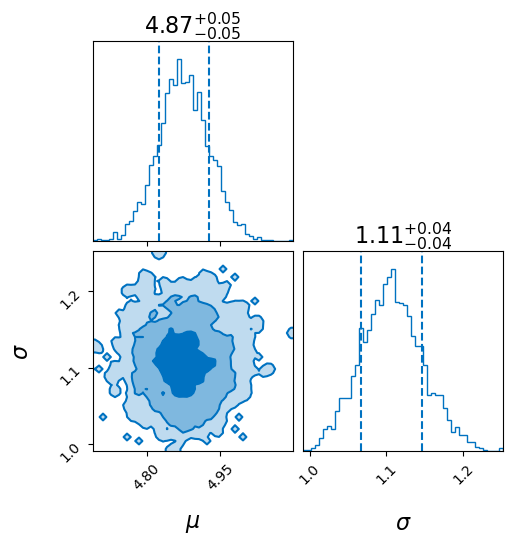

In [55]:
def hyper_prior_lognorm(dataset, s_mu, s_sigma):
    return np.exp(- (np.log(dataset['mu']) - s_mu)**2 / (2 * s_sigma**2)) /\
        (2 * np.pi * s_sigma**2)**0.5/(dataset['mu'])
hp_priors_lognorm = dict(s_mu=Uniform(4, 6, 's_mu', '$\mu$'),
                 s_sigma=Uniform(0.5, 1.5, 's_sigma', '$\sigma$') )

hyper_prior_lognorm=hyper_prior_lognorm

hp_likelihood_lognorm = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_lognorm,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_lognorm =hp_priors_lognorm

# And run sampler
result_lognorm = run_sampler(
    likelihood=hp_likelihood_lognorm, priors=hp_priors_lognorm, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, log_evidences=np.log(1e-6),label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_lognorm.plot_corner()

15:51 bilby INFO    : Running for label 'u_hype_65413', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
15:51 bilby INFO    : Analysis priors:
15:51 bilby INFO    : mlo=Uniform(minimum=1, maximum=50, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
15:51 bilby INFO    : mup=Uniform(minimum=50, maximum=10000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
15:51 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
15:51 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
15:51 bilby INFO    : Single likelihood evaluation took 1.705e-03 s
15:51 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodi

1it [00:00, ?it/s]

16:03 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_65413_resume.pickle
16:11 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_65413_resume.pickle
16:11 bilby INFO    : Starting to close worker pool.
16:11 bilby INFO    : Finished closing worker pool.


16:11 bilby INFO    : Rejection sampling nested samples to obtain 2354 posterior samples
16:11 bilby INFO    : Sampling time: 0:19:07.614146
16:11 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:11 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:11 bilby INFO    : Summary of results:
nsamples: 2354
ln_noise_evidence:  0.000
ln_evidence: 565.761 +/-  0.115
ln_bayes_factor: 565.761 +/-  0.115



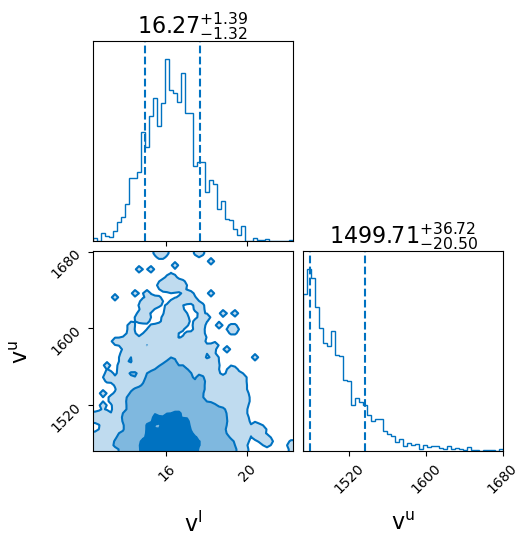

In [52]:
def hyper_prior_logu(dataset,mlo,mup):
    return (( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))/( dataset['mu'] * np.log(mup / mlo) )

hp_priors_logu = dict(mlo=Uniform(1, 50, 'mlo',r'$\rm{v^l}$'),
                mup=Uniform(50, 10000, 'mup',r'$\rm{v^u}$'))
#end log-uniform

hyper_prior_logu=hyper_prior_logu

hp_likelihood_logu = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_logu,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_logu =hp_priors_logu

# And run sampler
result_logu = run_sampler(
    likelihood=hp_likelihood_logu, priors=hp_priors_logu, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_logu.plot_corner()

11:09 bilby INFO    : Running for label 'u_hype_24580', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
11:09 bilby INFO    : Analysis priors:
11:09 bilby INFO    : mu=Uniform(minimum=150, maximum=1000, name='mlo', latex_label='$\\rm{\\mu}$', unit=None, boundary=None)
11:09 bilby INFO    : sigma=Uniform(minimum=100, maximum=2500, name='sigma', latex_label='$\\rm{\\sigma}$', unit=None, boundary=None)
11:09 bilby INFO    : nu=LogUniform(minimum=0.01, maximum=300, name='nu', latex_label='$\\rm{\\nu}$', unit=None, boundary=None)
11:09 bilby INFO    : tau=Uniform(minimum=2.01, maximum=10, name='tau', latex_label='$\\rm{\\tau}$', unit=None, boundary=None)
11:09 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
11:09 bilby INFO    : Analysis likelihood noise evidence: 0
11:09 bilby INFO    : Single likelihood evaluation took 6.702e-03 s
11:09 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 80

1it [00:00, ?it/s]

11:27 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_24580_resume.pickle
11:43 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_24580_resume.pickle
11:59 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_24580_resume.pickle
12:12 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_24580_resume.pickle
12:24 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_24580_resume.pickle
12:38 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_24580_resume.pickle
12:51 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/u_hype_24580_resume.pickle
13:12 bilby INFO    : Written checkpoint file /home/lz/work/pu

18:51 bilby INFO    : Rejection sampling nested samples to obtain 2756 posterior samples
18:51 bilby INFO    : Sampling time: 7:42:07.925896
18:51 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:51 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
18:51 bilby INFO    : Summary of results:
nsamples: 2756
ln_noise_evidence:  0.000
ln_evidence: 615.361 +/-  0.153
ln_bayes_factor: 615.361 +/-  0.153



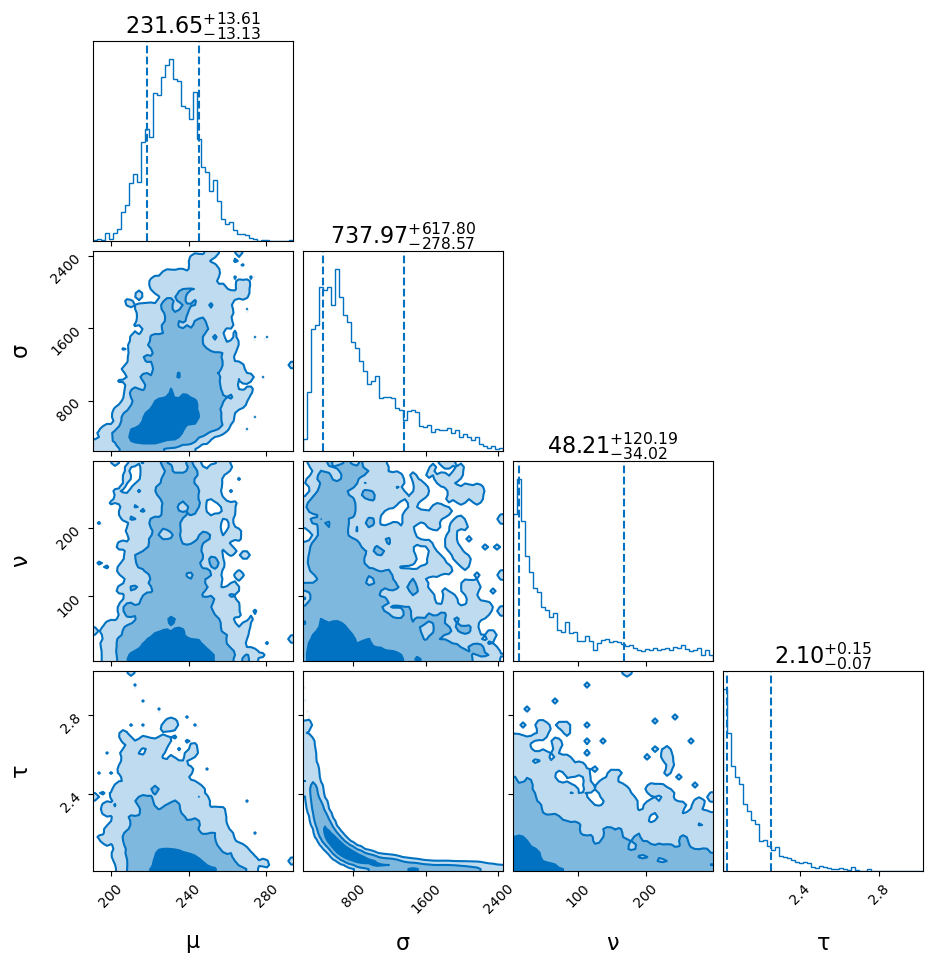

In [6]:
#begin SST
from scipy.special import beta
def hyper_prior_sst(dataset, mu,sigma,nu,tau):
        c = 2 * nu * ((1 + nu ** 2) *
                                beta(0.5, tau / 2) *
                                tau ** 0.5) ** -1
        m = ((2 * tau ** 0.5) * (nu - nu ** -1)) / (
                (tau - 1) * beta(0.5, 0.5 * tau))
        s2 = ((tau / (tau - 2)) * (
                nu ** 2 + nu ** -2 - 1) - m ** 2)
        mu_0 = mu - (sigma * m / np.sqrt(s2))
        sigma_0 = sigma / np.sqrt(s2)
        z = (dataset['mu'] - mu_0) / sigma_0
        p = np.where(dataset['mu'] < mu_0,
                     (c / sigma_0) * (1 + ((nu ** 2) * (z ** 2)) / tau) ** (
                             -(tau + 1) / 2),
                     (c / sigma_0) * (1 + (z ** 2) / ((nu ** 2) * tau)) ** (
                             -(tau + 1) / 2))
        return p

hp_priors_sst = dict(mu=Uniform(150, 1000, 'mlo',r'$\rm{\mu}$'),
                sigma=Uniform(100, 2500, 'sigma',r'$\rm{\sigma}$'),
                nu=LogUniform(0.01,300,'nu',r'$\rm{\nu}$'),
                tau=Uniform(2.01,10,'tau',r'$\rm{\tau}$') )
#end SST

hyper_prior_sst=hyper_prior_sst
hp_likelihood_sst = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_sst,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_sst =hp_priors_sst
 
# And run sampler
result_sst = run_sampler(
    likelihood=hp_likelihood_sst, priors=hp_priors_sst, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_sst.plot_corner()

10:31 bilby INFO    : Running for label 'double_maxwell_hype_62984', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
10:31 bilby INFO    : Analysis priors:
10:31 bilby INFO    : sigma1=Uniform(minimum=1, maximum=100, name='sigma1', latex_label='$\\sigma_1$(km/s)', unit=None, boundary=None)
10:31 bilby INFO    : sigma2=Uniform(minimum=100, maximum=400, name='sigma2', latex_label='$\\sigma_2$(km/s)', unit=None, boundary=None)
10:31 bilby INFO    : alpha=Uniform(minimum=0.01, maximum=0.99, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None)
10:31 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
10:31 bilby INFO    : Analysis likelihood noise evidence: 0
10:31 bilby INFO    : Single likelihood evaluation took 3.476e-02 s
10:31 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 800, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 60

1it [00:00, ?it/s]

10:44 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/double_maxwell_hype_62984_resume.pickle
10:54 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/double_maxwell_hype_62984_resume.pickle
11:02 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/double_maxwell_hype_62984_resume.pickle
11:02 bilby INFO    : Starting to close worker pool.
11:02 bilby INFO    : Finished closing worker pool.
11:02 bilby INFO    : Rejection sampling nested samples to obtain 2541 posterior samples
11:02 bilby INFO    : Sampling time: 0:29:42.648533
11:02 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


11:02 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
11:02 bilby INFO    : Summary of results:
nsamples: 2541
ln_noise_evidence:  0.000
ln_evidence: 545.928 +/-  0.109
ln_bayes_factor: 545.928 +/-  0.109



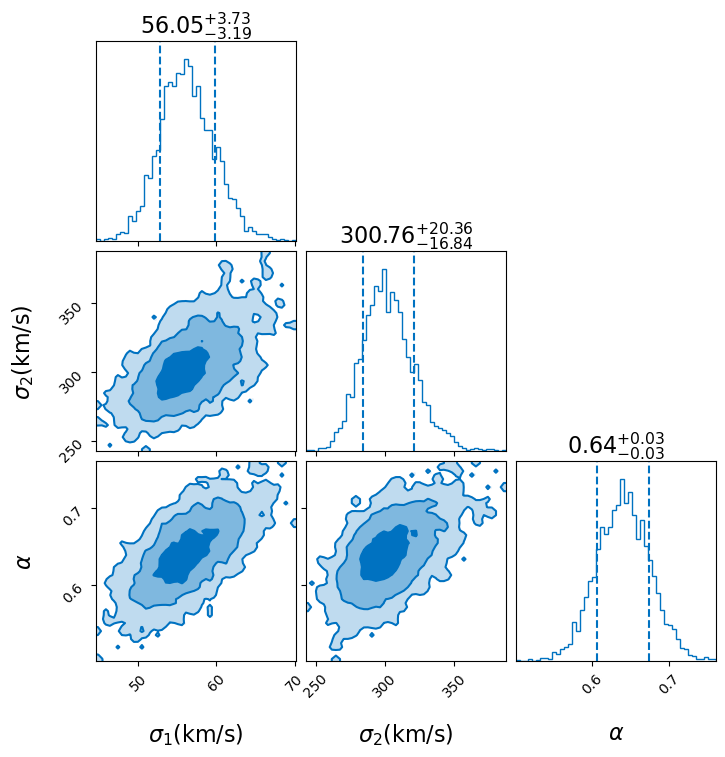

In [46]:
from scipy.stats import maxwell
def hyper_prior_double_maxwell(dataset,sigma1, sigma2, alpha):
    mup=10000
    mlo=1
    # 数据范围限制
    sigma_constraint = (mlo < sigma1) & (sigma1 < sigma2) & (sigma2 < mup)
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    
    # Maxwell PDF for the two components
    pdf1 = maxwell.pdf(dataset['mu'], scale=sigma1)
    pdf2 = maxwell.pdf(dataset['mu'], scale=sigma2)
    # Combined mixture PDF
    mixture_pdf = alpha * pdf1 + (1 - alpha) * pdf2
    # Apply range restriction
    log_likelihood = sigma_constraint*valid_range * mixture_pdf
    return log_likelihood

hp_priors_double_maxwell = dict(
    sigma1=Uniform(1, 100, 'sigma1', r'$\sigma_1$(km/s)'),
    sigma2=Uniform(100, 400, 'sigma2', r'$\sigma_2$(km/s)'),
    alpha=Uniform(0.01, 0.99, 'alpha', r'$\alpha$')
)

hyper_prior_double_maxwell = hyper_prior_double_maxwell

hp_likelihood_double_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_double_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_double_maxwell = hp_priors_double_maxwell

# 运行采样器
result_2M = run_sampler(
    likelihood=hp_likelihood_double_maxwell, priors=hp_priors_double_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='double_maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_2M.plot_corner()

14:52 bilby INFO    : Running for label 'exponential_hype_36664', output will be saved to '/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir'
14:52 bilby INFO    : Analysis priors:
14:52 bilby INFO    : lam=Uniform(minimum=0.004, maximum=0.005, name='lam', latex_label='$\\lambda$', unit=None, boundary=None)
14:52 bilby INFO    : mlo=Uniform(minimum=1, maximum=10, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
14:52 bilby INFO    : mup=LogUniform(minimum=10, maximum=10000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
14:52 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
14:52 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
14:52 bilby INFO    : Single likelihood evalu

1it [00:00, ?it/s]

15:01 bilby INFO    : Written checkpoint file /home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/exponential_hype_36664_resume.pickle
15:01 bilby INFO    : Starting to close worker pool.
15:01 bilby INFO    : Finished closing worker pool.


15:01 bilby INFO    : Rejection sampling nested samples to obtain 1974 posterior samples
15:01 bilby INFO    : Sampling time: 0:04:55.889771
15:01 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:01 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:01 bilby INFO    : Summary of results:
nsamples: 1974
ln_noise_evidence:  0.000
ln_evidence: 602.630 +/-  0.051
ln_bayes_factor: 602.630 +/-  0.051



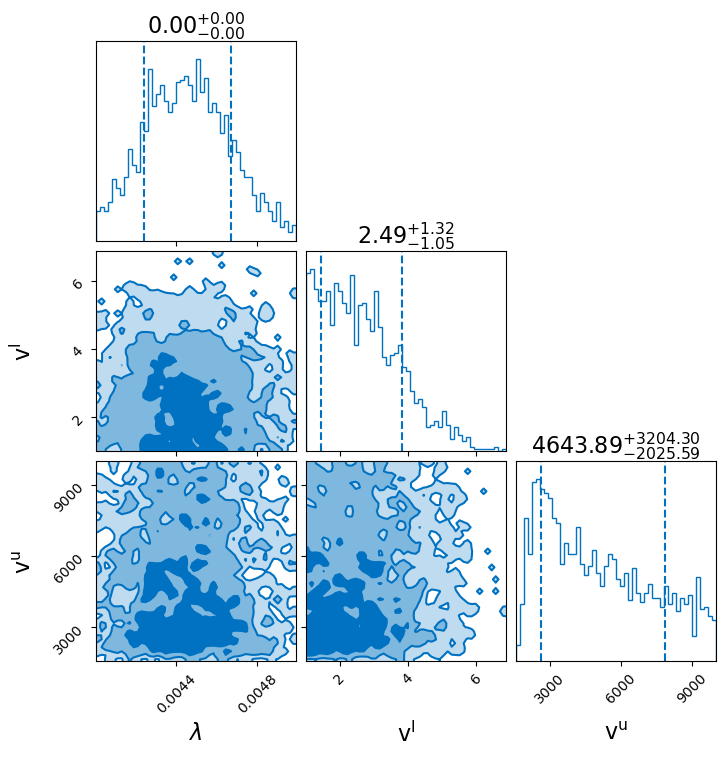

In [48]:
from scipy.stats import expon

def hyper_prior_exponential(dataset, mup, mlo, lam):
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    # Exponential PDF
    pdf_values = expon.pdf(dataset['mu'], scale=1/lam)
    # 限制范围外的概率为 0
    log_likelihood = valid_range * pdf_values
    return log_likelihood

hp_priors_exponential = dict(
    lam=Uniform(0.004, 0.005, 'lam', r'$\lambda$'),  # 速率参数范围
    mlo=Uniform(1, 10, 'mlo', r'$\rm{v^l}$'),  # 下限范围
    mup=LogUniform(10, 10000, 'mup', r'$\rm{v^u}$')    # 上限范围
)
hyper_prior_exponential = hyper_prior_exponential

hp_likelihood_exponential = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_exponential,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_exponential = hp_priors_exponential

# 运行采样器
result_exponential = run_sampler(
    likelihood=hp_likelihood_exponential, priors=hp_priors_exponential, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='exponential_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)
# 绘制角图
result_exponential.plot_corner()

In [49]:
import bilby
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_exponential='/home/lz/work/pulsar_kick_velocity/mnt/BuffaloB/lz/hy_outdir/exponential_hype_36664_result.json'
result_exponential = bilby.result.read_in_result(file_exponential)
posterior_exponential=result_exponential.posterior
print(posterior_exponential)

           lam       mlo          mup  log_likelihood  log_prior
0     0.004614  6.860194  3623.652687      598.908020  -5.417352
1     0.004990  5.682963  6286.638713      598.951889  -5.968296
2     0.004766  6.296360  6160.895496      599.486681  -5.948091
3     0.004175  3.888091  1567.134134      599.493576  -4.579118
4     0.004806  6.175488  8813.183475      599.518893  -6.306118
...        ...       ...          ...             ...        ...
1969  0.004441  1.318389  7581.990414      604.519457  -6.155645
1970  0.004441  1.384673  4956.623159      604.519517  -5.730594
1971  0.004428  1.421321  7655.783976      604.519667  -6.165331
1972  0.004429  1.519343  9564.769946      604.519737  -6.387956
1973  0.004429  1.445127  7210.802042      604.519785  -6.105449

[1974 rows x 5 columns]


1σ 中心区间: (0.0042, 0.00467)
0.0044504873528880395


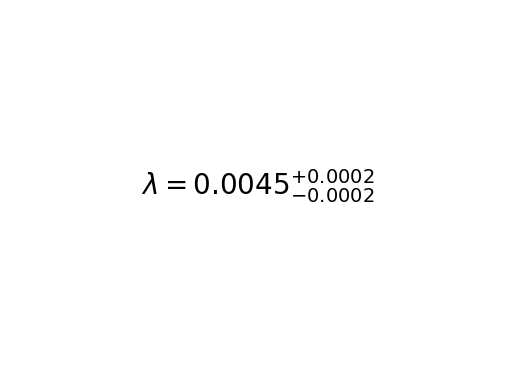

In [50]:

# 计算中心区间
center_interval = np.percentile(posterior_exponential['lam'], [16, 84])
print(f"1σ 中心区间: ({center_interval[0]:.4f}, {center_interval[1]:.4})")
median_lam=np.median(posterior_exponential['lam'])
print(median_lam)
alpha = center_interval[1] - median_lam
beta = median_lam - center_interval[0]

latex_str = f"$\\lambda = {median_lam:.4f} ^{{+{alpha:.4f}}} _{{-{beta:.4f}}}$"
# 显示LaTeX公式
plt.text(0.5, 0.5, latex_str, fontsize=20, ha='center')
plt.axis('off')  # 关闭坐标轴
plt.show()